# Taher Muhammedali - 0478012

## Assignment 2 - Task 2 - Data Science ESM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy
import cartopy.crs as ccrs
import warnings
warnings.filterwarnings("ignore")

### (a)

In [2]:
# Importing csv as GDF

In [3]:
fn = "https://tubcloud.tu-berlin.de/s/aZZfWGd8rmbEx39/download/global_power_plant_database.csv"

In [4]:
df = pd.read_csv(fn, index_col=3)
geometry = gpd.points_from_xy(df['longitude'], df['latitude'])
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs=4326)
gdf.head(2)

,country,country_long,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,...,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017,geometry
gppd_idnr,,,,,,,,,,,,,,,,,,,,,
GEODB0040538,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.119,Hydro,NaN,NaN,NaN,...,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (65.11900 32.32200)
WKS0070144,AFG,Afghanistan,Kandahar DOG,10.0,31.670,65.795,Solar,NaN,NaN,NaN,...,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,POINT (65.79500 31.67000)


### (b)

In [5]:
# Filtering rows where Primary Fuel is Hydro

In [6]:
hydrodf = gdf.loc[gdf['primary_fuel'] == 'Hydro']
hydrodf.head(2)

,country,country_long,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,...,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017,geometry
gppd_idnr,,,,,,,,,,,,,,,,,,,,,
GEODB0040538,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.1190,Hydro,NaN,NaN,NaN,...,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (65.11900 32.32200)
GEODB0040541,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.556,69.4787,Hydro,NaN,NaN,NaN,...,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (69.47870 34.55600)


In [7]:
# Filling NA values in generations columns with zero to avoid errors in analysis later on
hydrodf['estimated_generation_gwh_2014'] = hydrodf['estimated_generation_gwh_2014'].fillna(0)
hydrodf['estimated_generation_gwh_2015'] = hydrodf['estimated_generation_gwh_2015'].fillna(0)
hydrodf['estimated_generation_gwh_2016'] = hydrodf['estimated_generation_gwh_2016'].fillna(0)
hydrodf['estimated_generation_gwh_2017'] = hydrodf['estimated_generation_gwh_2017'].fillna(0)

### (c)

In [8]:
print ("The oldest hydro powerplant is",hydrodf.loc[hydrodf['commissioning_year'] == hydrodf.commissioning_year.min(), 'name'].item(),"from year", round(hydrodf.commissioning_year.min()))

The oldest hydro powerplant is Granite from year 1896


In [9]:
print ("The newest hydro powerplant is",hydrodf.loc[hydrodf['commissioning_year'] == hydrodf.commissioning_year.max(), 'name'].item(),"from year", round(hydrodf.commissioning_year.max()))

The newest hydro powerplant is Timothy Lake Powerhouse from year 2019


### (d)

In [10]:
print( "Share of hydro powerplants with capacities below 10MW is", (round((len(hydrodf.loc[hydrodf['capacity_mw'] < 10]) / len(hydrodf) * 100),1)),"%")

Share of hydro powerplants with capacities below 10MW is 35.3 %


In [11]:
print( "Share of hydro powerplants with capacities below 100MW is", (round((len(hydrodf.loc[hydrodf['capacity_mw'] < 100]) / len(hydrodf) * 100),1)),"%")

Share of hydro powerplants with capacities below 100MW is 75.6 %


### (e)

In [12]:
# Using Groupby function on Country names and Capacity (converted to GW)

In [13]:
grouped = hydrodf.groupby("country_long").capacity_mw.sum()/1000
grouped.nlargest(3)

country_long
China                       259.025600
United States of America    101.656900
Brazil                       98.039384
Name: capacity_mw, dtype: float64

### (f)

In [14]:
# Finding the hydro powerplants with highest generation and showing only rows required

In [15]:
hydrofive = hydrodf.nlargest(5, 'estimated_generation_gwh_2017')
hydrofive = hydrofive[['country','name','commissioning_year','capacity_mw','estimated_generation_gwh_2017']]
hydrofive

,country,name,commissioning_year,capacity_mw,estimated_generation_gwh_2017
gppd_idnr,,,,,
WRI1000452,CHN,Three Gorges Dam,2003.0,22500.0,82810.77
WRI1070877,CHN,Baihetan Dam,NaN,13050.0,58470.77
WRI1000453,CHN,Xiluodu,2013.0,12600.0,56454.54
WRI1022983,PRY,Itaipu Binacional Dam (Paraguay part),1984.0,7000.0,47320.15
WRI1018677,VEN,Simon Bolivar (Guri),NaN,8851.0,41176.73


### (g)

In [16]:
# Finding capacity factor of 2017 generation and plotting global map

In [17]:
hydrodf['est2017cp'] = hydrodf['estimated_generation_gwh_2017']/max(hydrodf['estimated_generation_gwh_2017'])

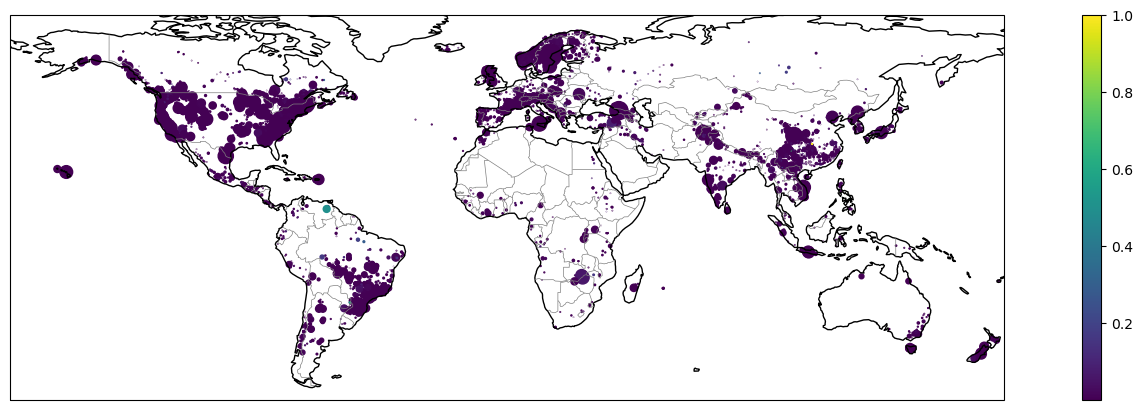

In [18]:
fig = plt.figure(figsize=(20,5))

ax = plt.axes(projection=ccrs.PlateCarree())

# Marksersize relative to Capacity and color is represented by 2017 generation

hydrodf.plot(
    ax=ax,
    column='est2017cp',
    markersize=gdf.capacity_mw/50, # Markersize adjusted manually
    legend=True
)
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, color='grey', linewidth=0.5)

### (h)

In [19]:
hydrodfcomm = hydrodf[hydrodf['commissioning_year'].notna()]
print((len(hydrodf) - len(hydrodfcomm)),"plants are missing commissioning year is which is approximately", round(((len(hydrodf) - len(hydrodfcomm))/len(hydrodf) * 100),1),"% of all hydro powerplants")

3359 plants are missing commissioning year is which is approximately 46.9 % of all hydro powerplants


### (i)

In [20]:
# Finding weighted mean for Capacity, then multiplying it with Year to find weighted year and then finding its mean

In [21]:
capmean = hydrodfcomm.capacity_mw.sum()/len(hydrodfcomm)
hydrowt = hydrodfcomm.copy()
hydrowt['weighted_mw'] = hydrowt.capacity_mw / capmean
hydrowt['yearwt'] = hydrowt.weighted_mw * hydrowt.commissioning_year
print("The capacity-weighted mean age of all hydro plants is",round(hydrowt.yearwt.sum()/len(hydrowt)))

The capacity-weighted mean age of all hydro plants is 1987


### (j)

In [22]:
# Totalling all generation values from 2014-2017 to calculate weighted age

In [23]:
hydrodfcomm['totalgen'] = hydrodfcomm['estimated_generation_gwh_2014'] + hydrodfcomm['estimated_generation_gwh_2015'] + hydrodfcomm['estimated_generation_gwh_2016'] + hydrodfcomm['estimated_generation_gwh_2017']

In [24]:
hydrodfcomm.head(2)

,country,country_long,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,...,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017,geometry,est2017cp,totalgen
gppd_idnr,,,,,,,,,,,,,,,,,,,,,
WRI1002169,ALB,Albania,Bistrica 1,27.0,39.9116,20.1047,Hydro,NaN,NaN,NaN,...,105.45,88.45,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (20.10470 39.91160),0.001068,348.66
WRI1002170,ALB,Albania,Fierza,500.0,42.2514,20.0431,Hydro,NaN,NaN,NaN,...,1795.15,1648.24,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (20.04310 42.25140),0.019904,6223.72


In [25]:
# Creating three lists below through for loops. Didn't use Groupby method

In [26]:
countrylist = hydrodfcomm['country'].unique() # Creating a list of all countries 
countrymean = [] # This list will save all values of mean age
countrylonglist = [] # This list is to get full name of countries

for country in countrylist: # In this loop it matches each country in the above countrylist and extracts it's full name
    test = hydrodfcomm.loc[hydrodfcomm['country'] == country]
    countrylonglist.append(test['country_long'].unique())

for country in countrylist: # In this loop it extracts the relevant rows for weighted age calculation
    countrydf = hydrodfcomm.loc[hydrodfcomm['country'] == country]
    genmean = countrydf.totalgen.sum()/len(countrydf)

    countrydf['weightedgen'] = countrydf.totalgen / genmean

    countrydf['yearwt'] = countrydf.weightedgen * countrydf.commissioning_year
    countrymean.append(round(countrydf.yearwt.sum()/len(countrydf)))


len(countrymean)==len(countrylist)==len(countrylonglist) # Affirming if the above for loops returned as many values as the number of countries

True

In [27]:
# Putting those lists in a dataframe
abc = pd.DataFrame()
abc['Country'] = countrylist
abc['Country Long'] = countrylonglist
abc['Mean_Year'] = countrymean
abc.head(2)

,Country,Country Long,Mean_Year
0,ALB,[Albania],1979
1,DZA,[Algeria],1952


In [28]:
# Countries with the five newest hydro powerplants

In [29]:
abc.nlargest(5, 'Mean_Year')

,Country,Country Long,Mean_Year
40,PHL,[Philippines],2017
60,VEN,[Venezuela],2016
8,KHM,[Cambodia],2013
12,ECU,[Ecuador],2010
14,ETH,[Ethiopia],2009


In [30]:
# Countries with the five oldest hydro powerplants

In [31]:
abc.nsmallest(5, 'Mean_Year')

,Country,Country Long,Mean_Year
1,DZA,[Algeria],1952
26,JAM,[Jamaica],1953
50,SWE,[Sweden],1955
16,FRA,[France],1957
18,DEU,[Germany],1961
